In [1]:
# Aplicaremos el filtro de Hodrick-Prescott (HP) a la variable "realcons" que representa el 
# Gasto de Consumo Real en Estados Unidos. El filtro HP es un método que nos permite descomponer una serie 
# temporal en dos componentes: uno tendencial (t) y otro cíclico (c).




In [2]:
# Importa las bibliotecas necesarias
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Carga la base de datos macrodata de statsmodels

In [4]:
datosmacro = sm.datasets.macrodata.load_pandas().data

In [5]:
datosmacro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [6]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [7]:
# Asigna un índice de fechas trimestrales desde 1959Q1 hasta 2009Q3

In [8]:
indice = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [9]:
datosmacro.index = indice

In [10]:
datosmacro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [11]:
# Grafica la serie temporal de "realcons"
# realcons  - Real personal consumption expenditures (Bil. of chained
#                     2005 US$, seasonally adjusted annual rate)

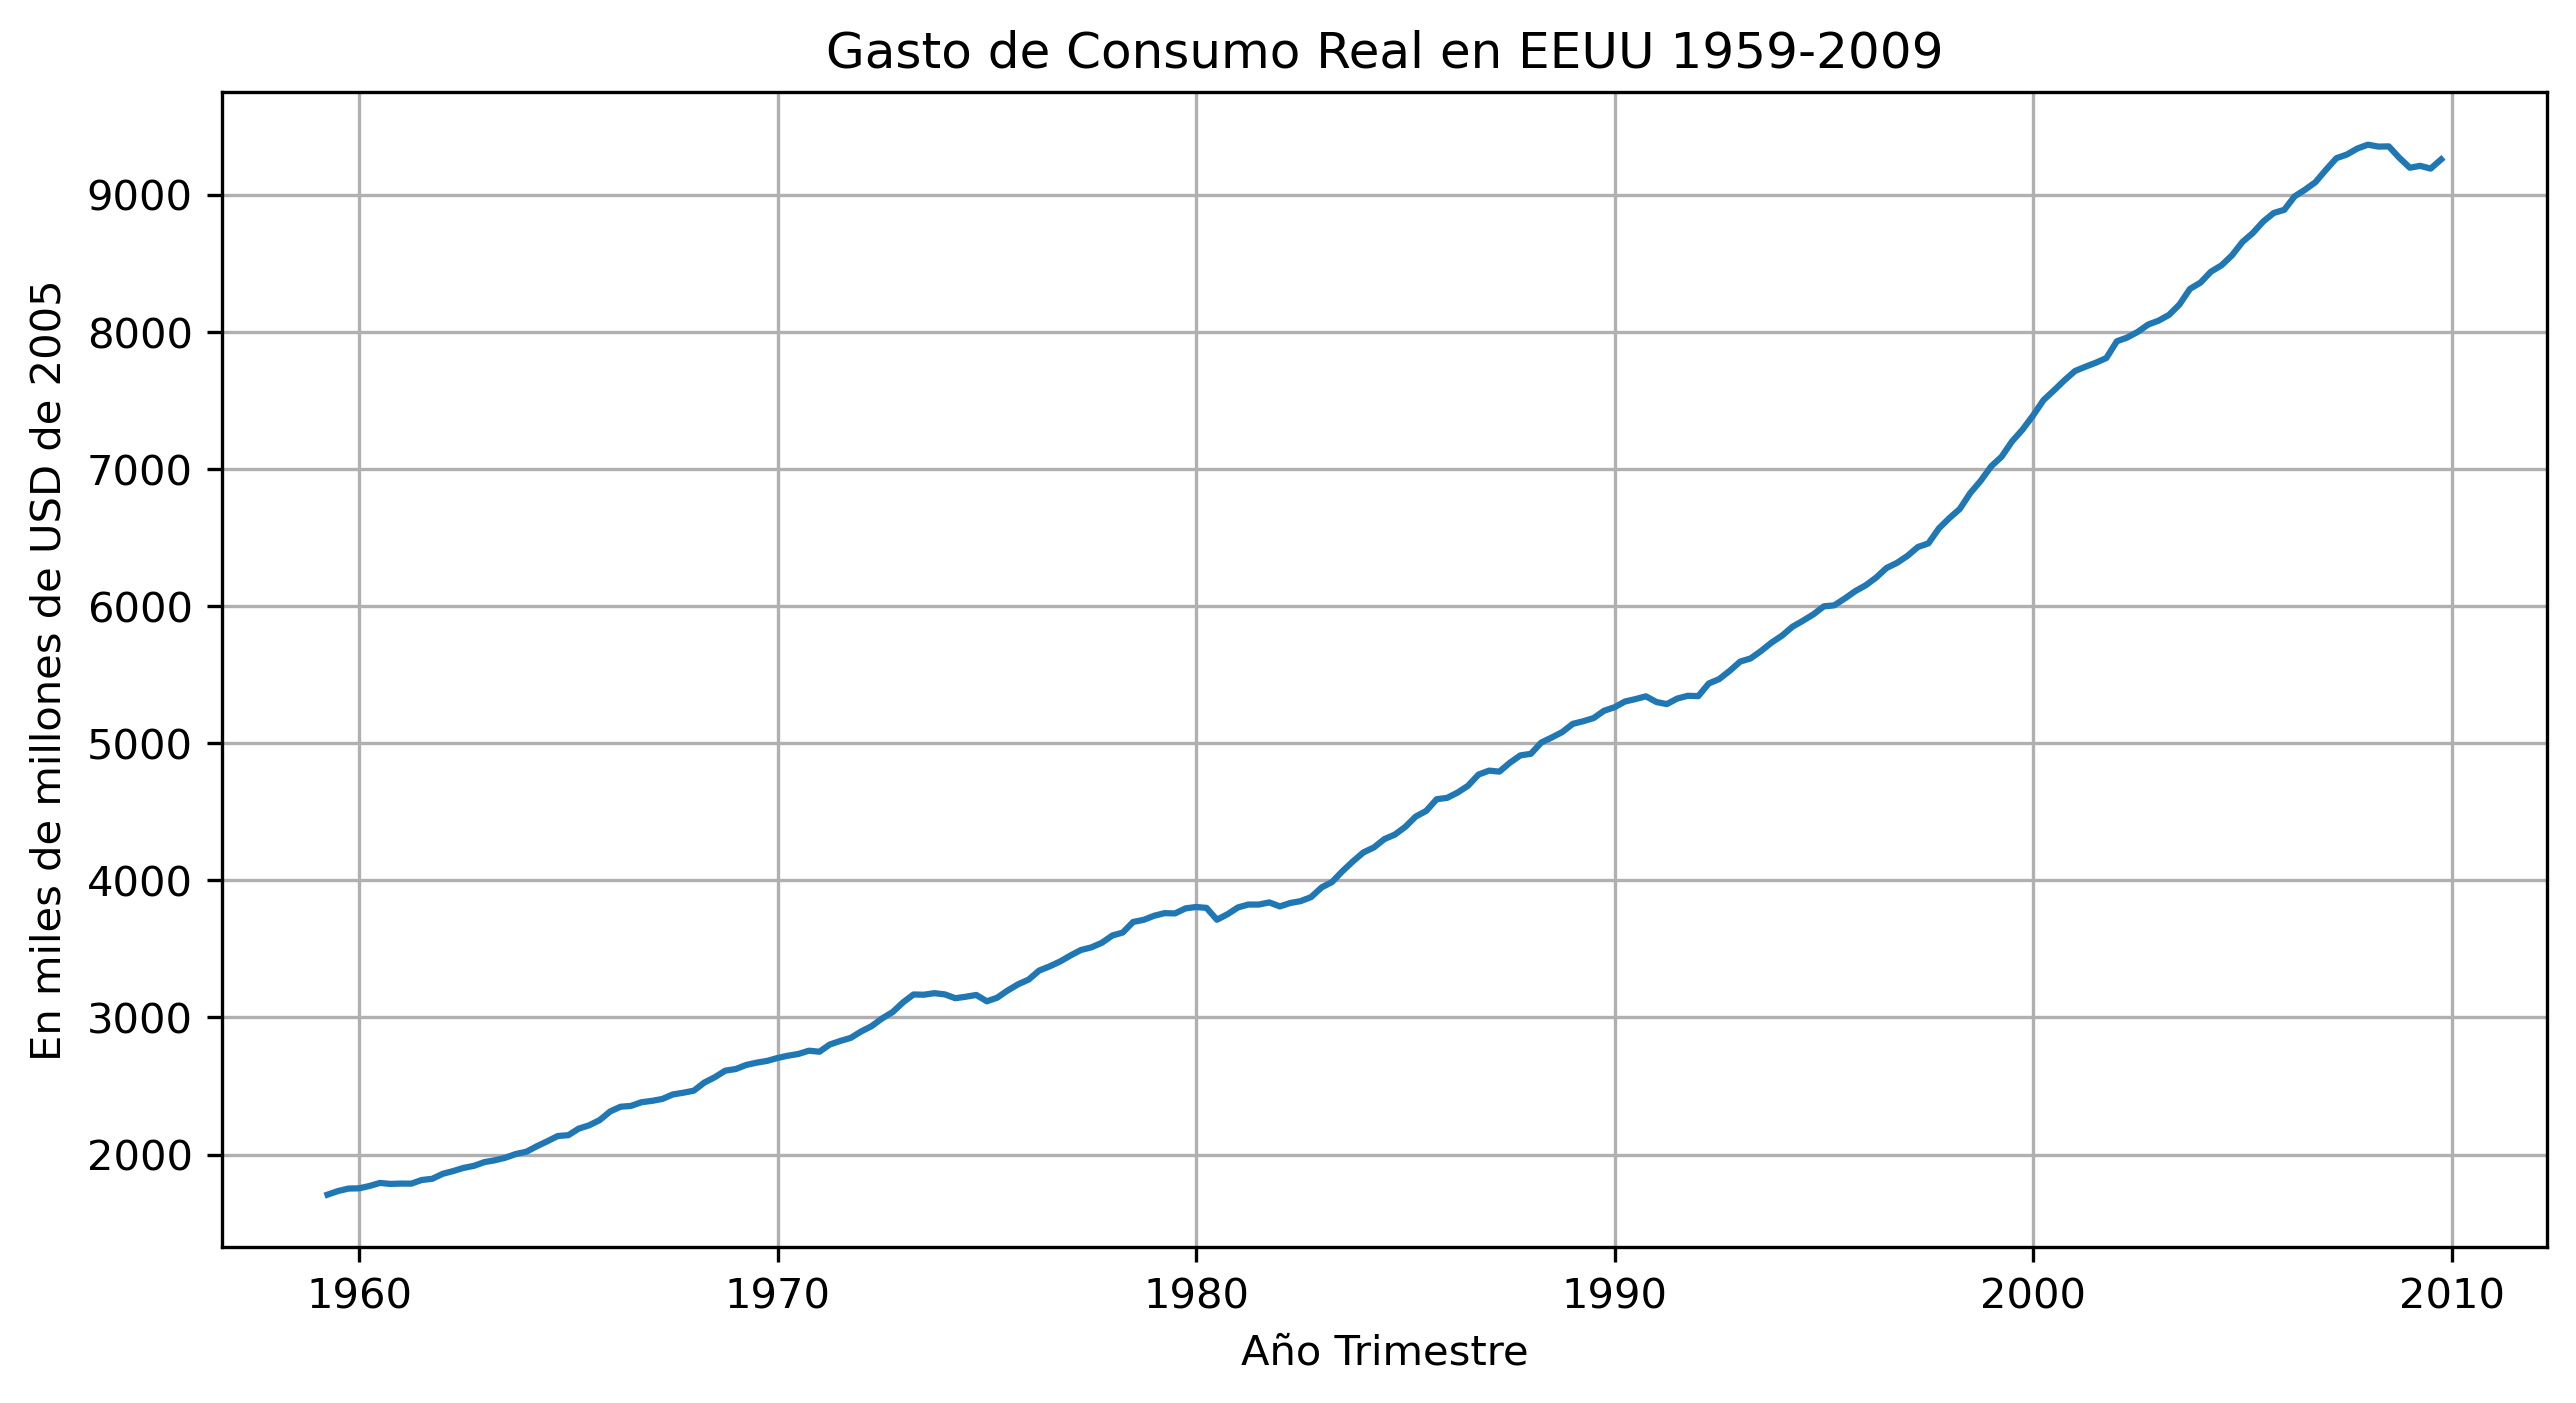

In [12]:
plt.figure(figsize=(10,5), dpi=300)
plt.plot(datosmacro['realcons'])
plt.title('Gasto de Consumo Real en EEUU 1959-2009')
plt.xlabel('Año Trimestre')
plt.ylabel('En miles de millones de USD de 2005')
plt.grid(True)
plt.show()

In [13]:
# Aplica el filtro de Hodrick-Prescott a la variable "realcons"
# El filtro de Hodrick-Prescott es un método para extraer el componente secular o tendencia de una serie temporal,
# propuesto en 1980 por Robert J. Hodrick y Edward C. Prescott. 
# Descompone la serie observada en dos componentes, uno tendencial y otro cíclico.
# y = t + c

In [14]:
filtrohp = sm.tsa.filters.hpfilter(datosmacro['realcons'])

In [15]:
filtrohp[1]

1959-03-31    1685.959140
1959-06-30    1701.979547
1959-09-30    1718.013356
1959-12-31    1734.093790
1960-03-31    1750.275194
                 ...     
2008-09-30    9311.968950
2008-12-31    9338.593911
2009-03-31    9364.570664
2009-06-30    9390.221936
2009-09-30    9415.773350
Name: realcons_trend, Length: 203, dtype: float64

In [16]:
# Separa el componente tendencial y cíclico

In [28]:
realcons_ciclo, realcons_tendencia=filtrohp

In [29]:
#Agrgar la tendencia a los datos originales

In [30]:
datosmacro['tendencia'] = realcons_tendencia

In [31]:
datosmacro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,tendencia
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,1685.959140
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,1701.979547
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,1718.013356
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,1734.093790
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,1750.275194


In [32]:
# Visualiza los datos originales y la tendencia

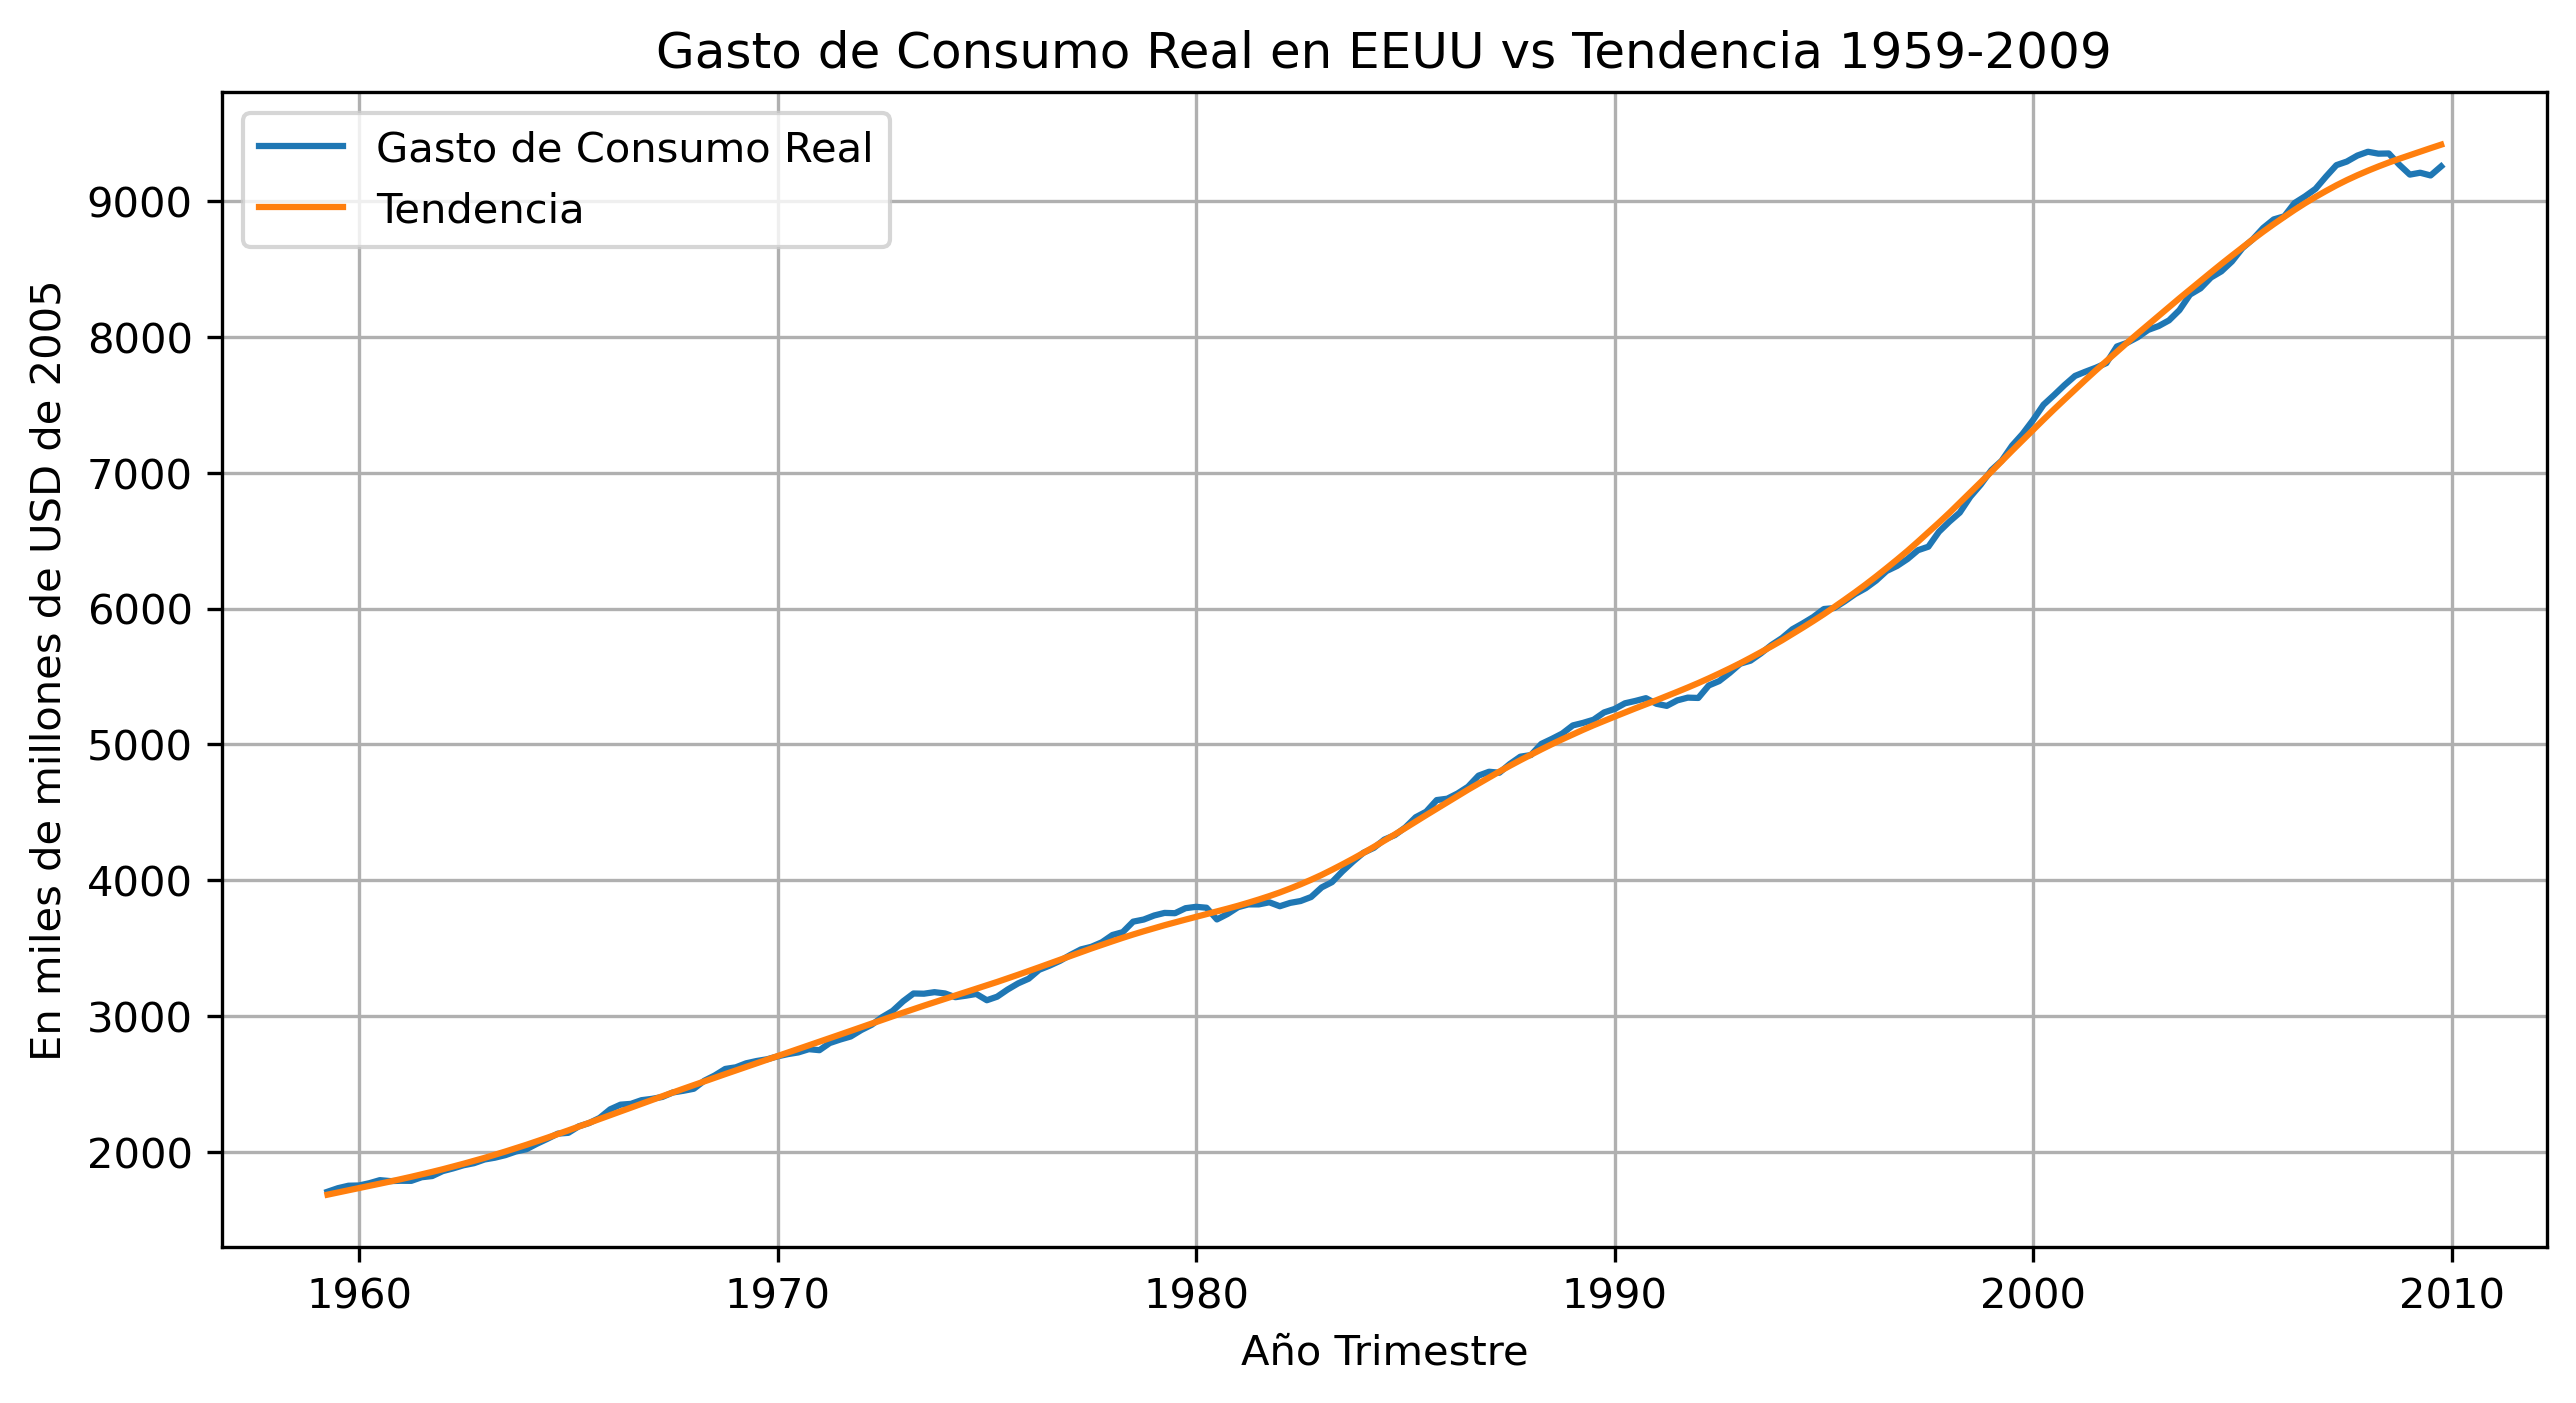

In [33]:
plt.figure(figsize=(10,5), dpi=300)
plt.plot(datosmacro[['realcons', 'tendencia']])
plt.title('Gasto de Consumo Real en EEUU vs Tendencia 1959-2009')
plt.xlabel('Año Trimestre')
plt.ylabel('En miles de millones de USD de 2005')
plt.legend(['Gasto de Consumo Real', 'Tendencia'])
plt.grid(True)
plt.show()

In [34]:
# Visualiza los datos a partir de 1999-03-31

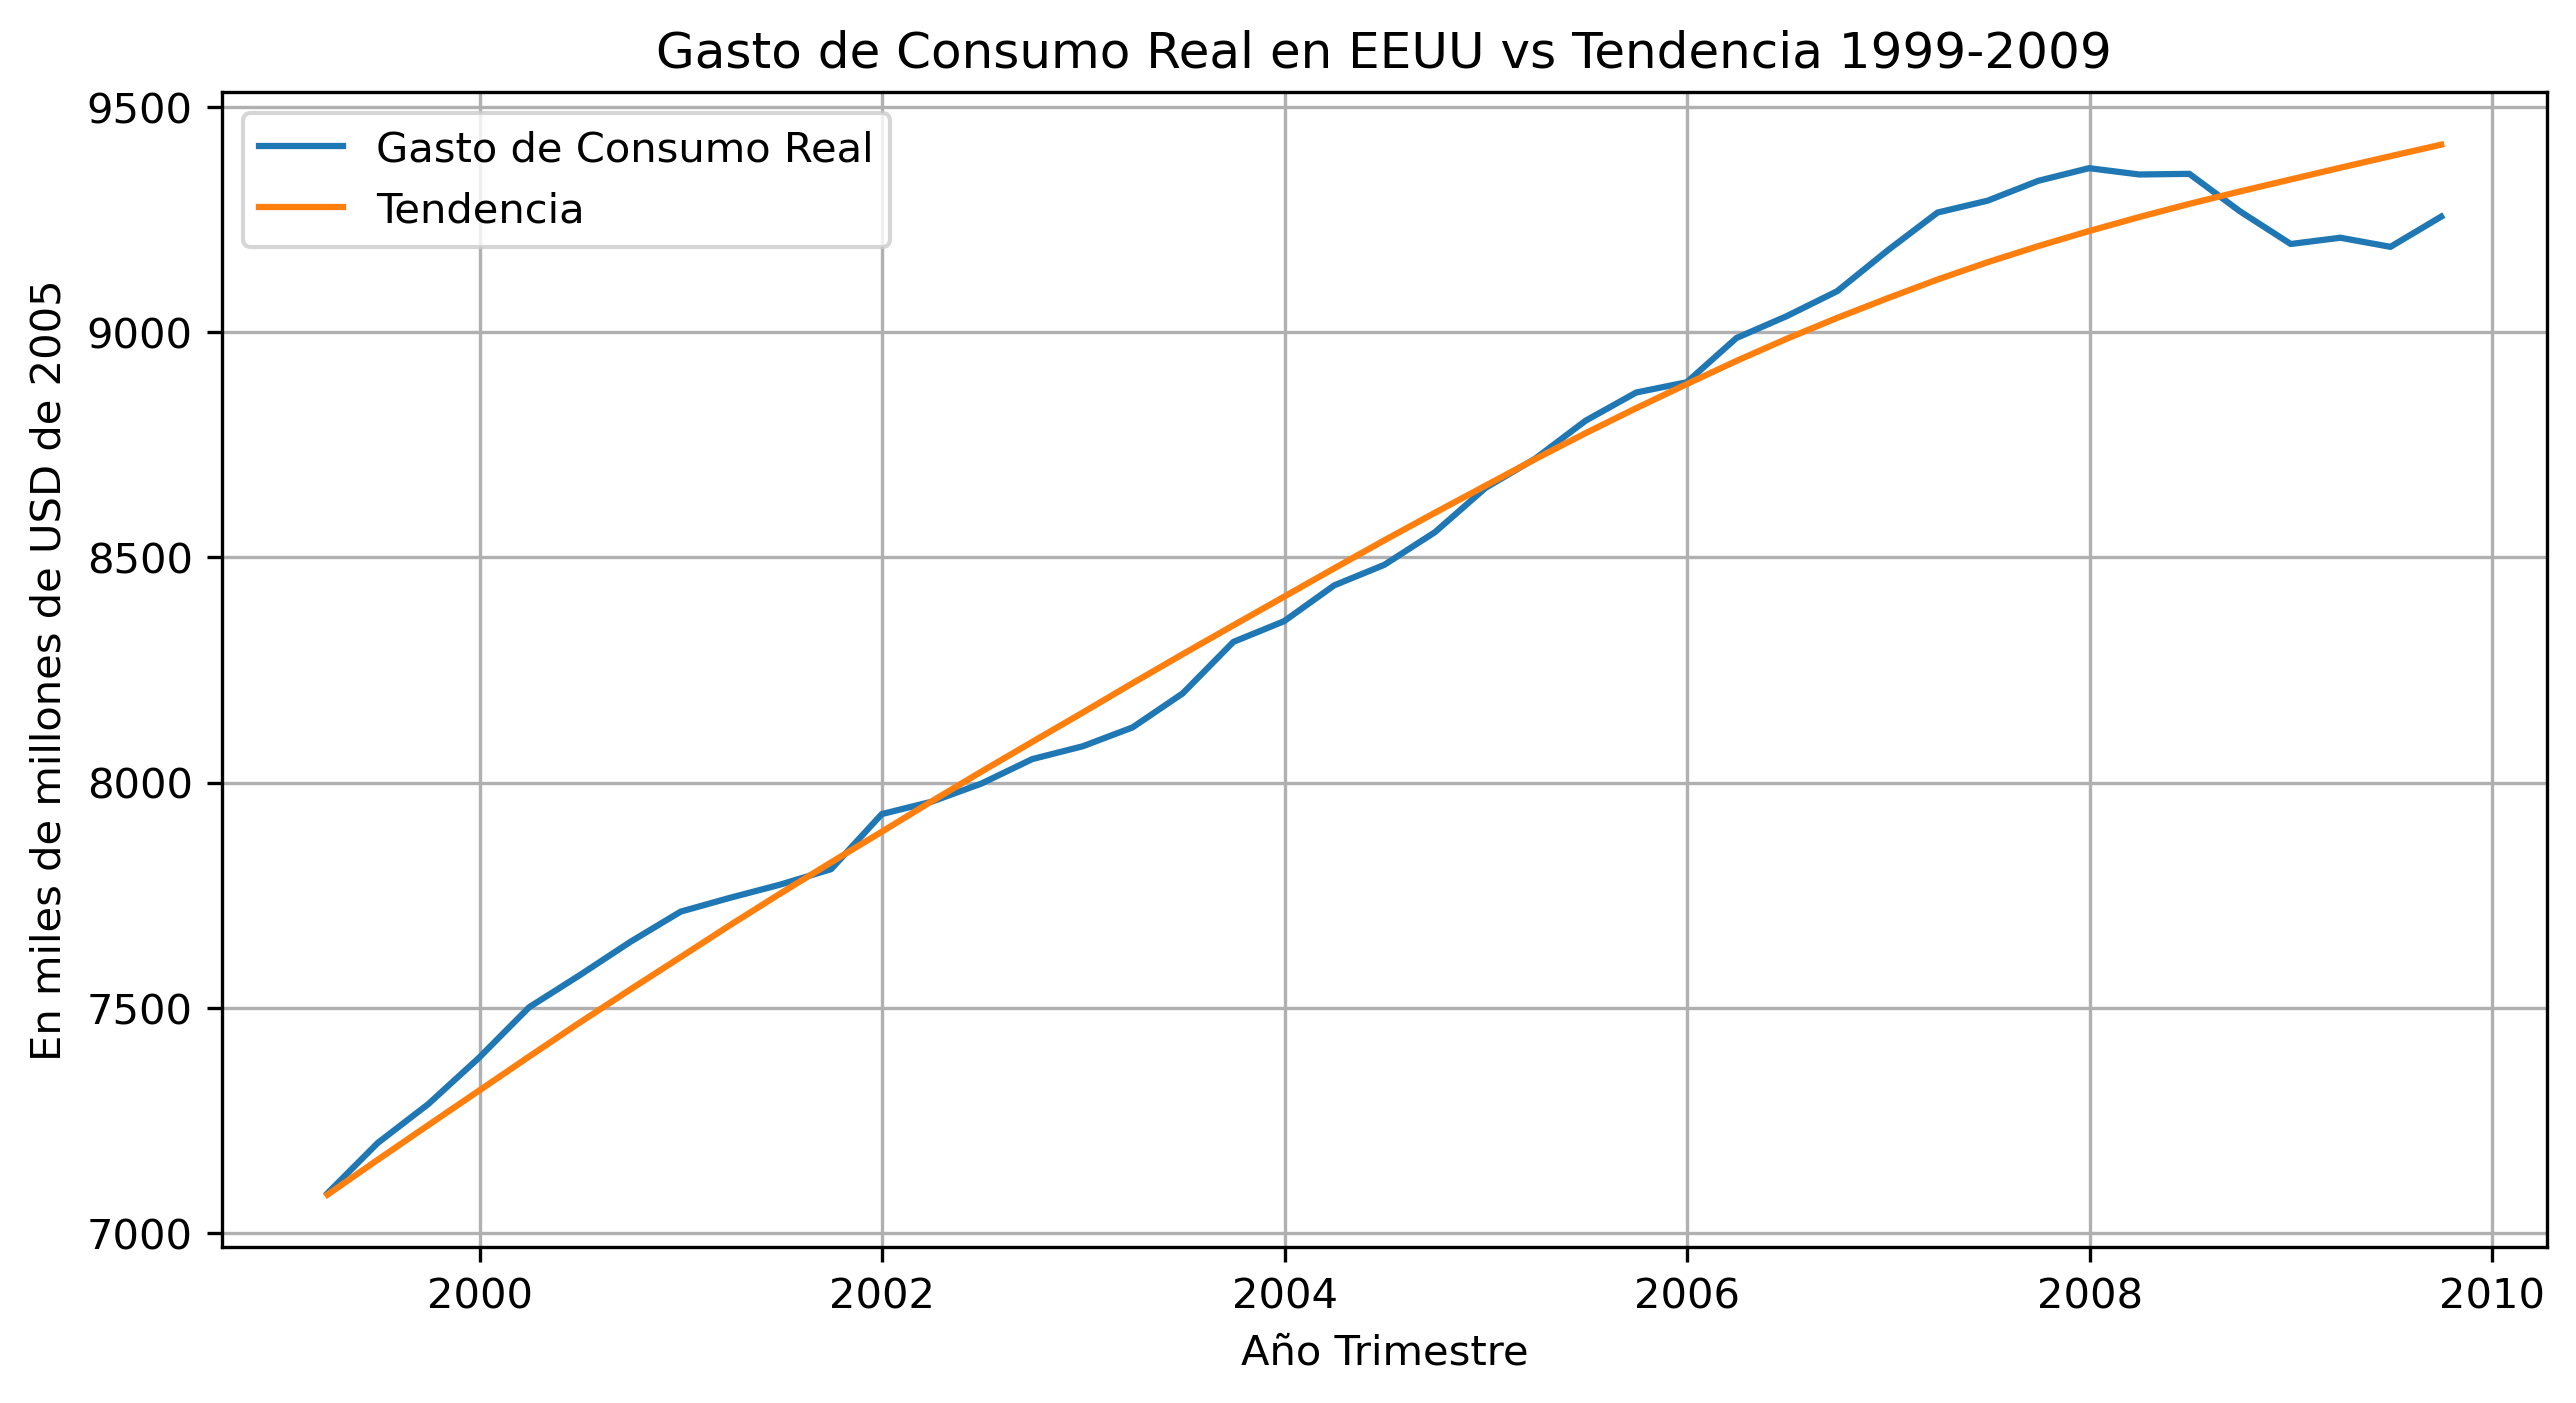

In [35]:
plt.figure(figsize=(10,5), dpi=300)
plt.plot(datosmacro[['realcons', 'tendencia']]["1999-03-31":])
plt.title('Gasto de Consumo Real en EEUU vs Tendencia 1999-2009')
plt.xlabel('Año Trimestre')
plt.ylabel('En miles de millones de USD de 2005')
plt.legend(['Gasto de Consumo Real', 'Tendencia'])
plt.grid(True)
plt.show()

In [36]:
# Extraigamos el componente cíclico
# El componente cíclico en el contexto del análisis de series de tiempo se refiere a las fluctuaciones o patrones
# que se repiten en los datos a lo largo del tiempo, pero que no siguen una tendencia constante hacia arriba o hacia abajo.
# En otras palabras, es como las "subidas y bajadas" que pueden observarse en los datos a lo largo de varios períodos, 
# pero que no representan una tendencia a largo plazo.

In [37]:
# Grafica el componente cíclico

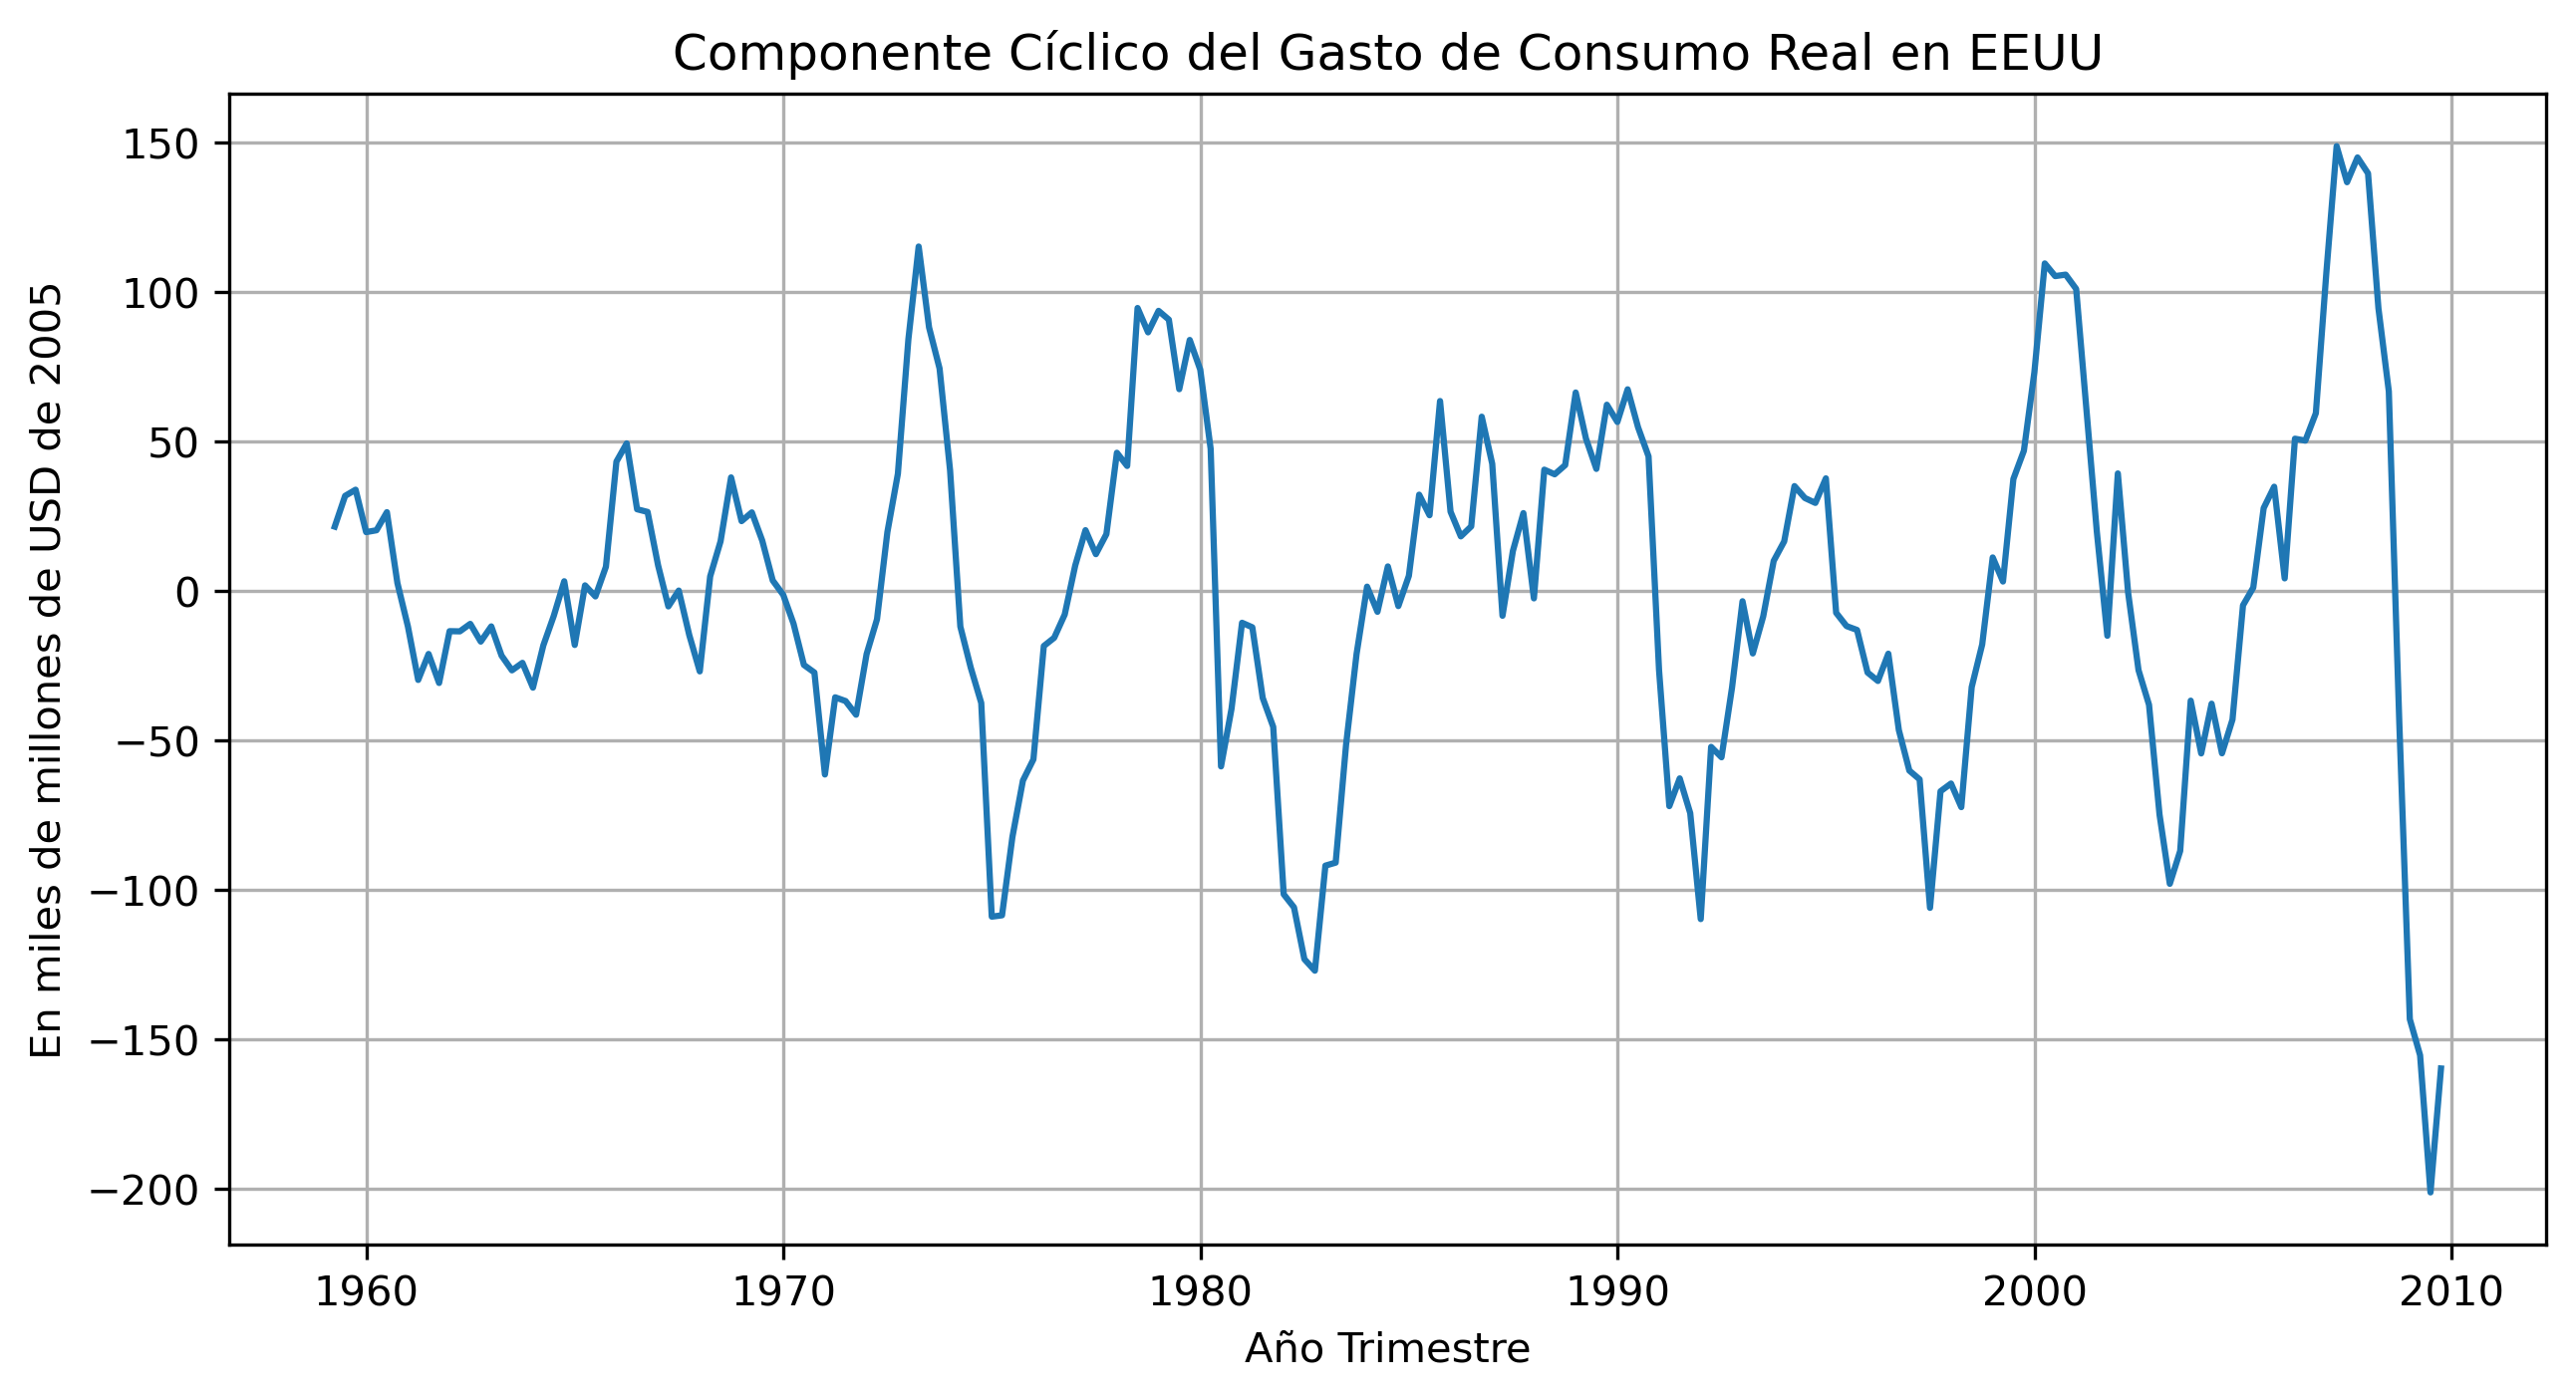

In [38]:
plt.figure(figsize=(10,5), dpi=300)
plt.plot(realcons_ciclo)
plt.title('Componente Cíclico del Gasto de Consumo Real en EEUU')
plt.xlabel('Año Trimestre')
plt.ylabel('En miles de millones de USD de 2005')
plt.grid(True)
plt.show()